# Disaster Tweets Classifier

In [1]:
import os
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
print('getcwd:      ', os.getcwd())

getcwd:       /Users/henrybiko/Documents/GitHub/disaster-tweets-classifier


In [3]:
train=pd.read_csv("/Users/henrybiko/Documents/GitHub/disaster-tweets-classifier/data/train_preprocessed_split.csv",nrows=100)

In [4]:
test=pd.read_csv("/Users/henrybiko/Documents/GitHub/disaster-tweets-classifier/data/val_preprocessed_split.csv",nrows=100)

In [5]:
data=pd.concat([test,train])

In [6]:
data.head(10)

,id,keyword,location_data,text_data,target_data,drinking,courtney,@blazerfan,#speakingfromexperience,@cortezera,...,http://t.co/ixw2cutk1c,#oklahoma,http://t.co/s4sicmyrmh,airplane,95,aaarrrgghhh,https://t.co/cvkqigr1az,screams~,#silver,http://t.co/cubc0nq6fd
0,5460,first%20responders,"St. Louis, Missouri",'NO LENDER FEES FOR VETERANS OR FIRST RESPONDE...,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9652,thunderstorm,Helsinki,Thunderstorm in Helsinki\n#thunder #lightning ...,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2098,casualty,NaN,Casualty Roleplay somebody please am so bored,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,5439,first%20responders,Aberdeenshire,US wants future first responders to be more hi...,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3497,derailed,NaN,@ItsQueenBaby I'm at work it's a bunch of ppl ...,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,5674,floods,NaN,Have you ever remembered an old song something...,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,5407,fire%20truck,NaN,'Choose to be happy. Fire truck the rest.' htt...,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,328,annihilated,NaN,Ready to get annihilated for the BUCS game,1,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,9135,suicide%20bomb,Nigeria,#Bestnaijamade: 16yr old PKK suicide bomber wh...,1,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,7192,mudslide,NaN,her cake looks like a mudslide hah,0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
data.drop(data.columns[[0, 1, 2,3]], axis = 1, inplace = True)

In [8]:
data.head(10)

,target_data,drinking,courtney,@blazerfan,#speakingfromexperience,@cortezera,faculty,@davidjordan88,@ronin_carbon,neighborhood,...,http://t.co/ixw2cutk1c,#oklahoma,http://t.co/s4sicmyrmh,airplane,95,aaarrrgghhh,https://t.co/cvkqigr1az,screams~,#silver,http://t.co/cubc0nq6fd
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [9]:
data=data.dropna()

In [10]:
X =data.drop(columns = ["target_data"])
y = data['target_data']

In [11]:
from sklearn.ensemble import ExtraTreesClassifier

In [12]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_)

[0. 0. 0. ... 0. 0. 0.]


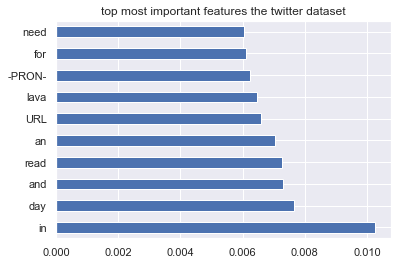

In [13]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("top most important features the twitter dataset")
plt.show()

In [ ]:
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
f,ax= plt.subplots(figsize=(12,8))
#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 137 missing from current font.
  font.set_text(s, 0, flags=flags)
/opt/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 157 missing from current font.
  font.set_text(s, 0, flags=flags)


KeyboardInterrupt: 

<Figure size 720x720 with 0 Axes>

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size=0.2,random_state=30,stratify=y)

 Building and Testing the Model

In [15]:
# ML Libraries
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [21]:
# Training Logistics Regression model
model = LogisticRegression(solver='lbfgs')
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(accuracy_score(y_test, predict))

0.5357142857142857


In [18]:
# no skill prediction probability
probs = [0 for _ in range(len(y_test))]

In [29]:
# probabilities for positive outcomes
model=LogisticRegression().fit(X_train,y_train)
reg_probs = model.predict_proba(X_test)[:, 1]

In [31]:
# calculate roc curves
from sklearn.metrics import roc_curve, auc, precision_score, accuracy_score, recall_score, roc_auc_score
no_pr, no_skl_tpr, _ = roc_curve(y_test, probs )
Reg_pr, logr_tpr, _ = roc_curve(y_test, reg_probs)

Text(0, 0.5, 'True Positive Rate')

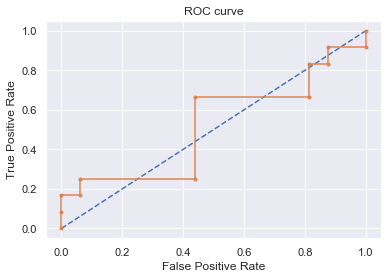

In [32]:
plt.plot(no_pr,no_skl_tpr, linestyle='--', label='No Skill')
plt.plot(Reg_pr, logr_tpr, marker='.', label='Logistic')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

In [90]:
# Training Naive Bayes model
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
preds_nb = NB_model.predict(X_test)
print(accuracy_score(y_test, preds_nb))

0.5357142857142857


In [91]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [102]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [103]:
from sklearn import metrics
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.42857142857142855
Mean Squared Error: 0.42857142857142855
Root Mean Squared Error: 0.6546536707079771


In [107]:
#Model and Training support vector machine
from sklearn import svm
clf = svm.SVC()
preds=clf.fit(X_train,y_train).predict(X_test)

print("SVM score:", clf.score(X_test,y_test))

SVM score: 0.5714285714285714
